<a href="https://colab.research.google.com/github/rmanzi13/Proyecto_Credit_Scoring/blob/main/Modelos_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Construcción de Modelos

In [1]:
import pandas as pd

In [2]:
df_banco = pd.read_csv('german_credit_numeric.csv')

In [3]:
df_banco.head(5)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,...,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,rango_plazos_credito,rango_valor_credito,sexo,estado_civil,rango_edad
0,0,1,5,5,1,1,4,1,4,1,...,2,3,1,1,1,1,2,0,1,5
1,1,2,3,5,5,3,2,1,2,1,...,1,3,1,0,1,4,6,1,0,1
2,0,4,5,8,5,2,2,1,3,1,...,1,2,2,0,1,1,3,0,1,3
3,0,1,3,4,5,2,2,3,4,2,...,1,3,2,0,1,4,8,0,1,3
4,1,1,4,1,5,3,3,1,4,4,...,2,3,2,0,1,2,5,0,1,4


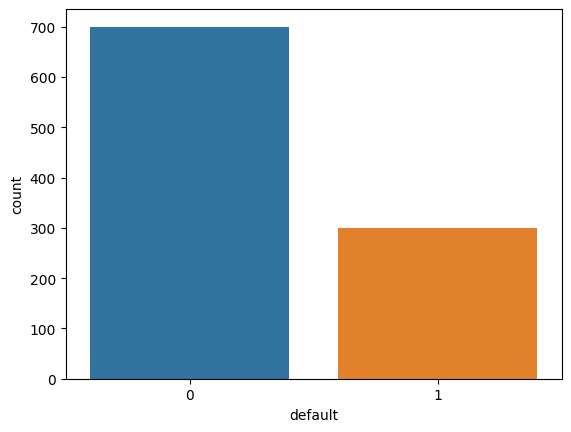

In [4]:
#variable target está desbalanceada. Miramos si los datos están balanceados
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x = 'default', data = df_banco)

In [5]:
df_banco.default.value_counts()

0    700
1    300
Name: default, dtype: int64

In [6]:
# biblioteca para balancear los datos utilizando over_sampling
from imblearn.over_sampling import SMOTE # is used for synthetic minority oversampling technic in machine learning. It generates synthetic samples to
                                         # balance imbalanced datasets, specifically targeting the minority class.

In [7]:
# Voy a separar variables predictoras de variables respuesta
X = df_banco.drop('default', axis = 1)
y = df_banco['default']

In [8]:
# Crea una instancia de la clase SMOTE con una semilla aleatoria (random_state) para reproducibilidad. Aplica el método fit_resample de SMOTE para generar datos sintéticos.
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)  # resample para generar nuevos datos que queden proporcionalmente correctos

In [9]:
#unión de los datos balanceados
df_banco = pd.concat([X, y], axis=1)

In [10]:
df_banco.head(3)

,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,...,job,people_under_maintenance,telephone,foreign_worker,rango_plazos_credito,rango_valor_credito,sexo,estado_civil,rango_edad,default
0,1,5,5,1,1,4,1,4,1,3,...,3,1,1,1,1,2,0,1,5,0
1,2,3,5,5,3,2,1,2,1,3,...,3,1,0,1,4,6,1,0,1,1
2,4,5,8,5,2,2,1,3,1,3,...,2,2,0,1,1,3,0,1,3,0


In [11]:
df_banco.shape # vemos que ya tenemos más de 1000 registros

(1400, 22)

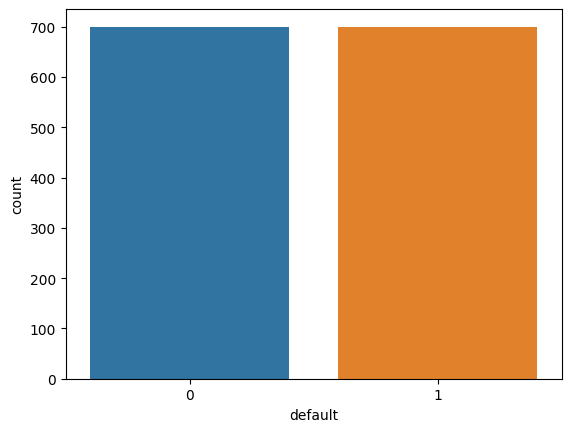

In [12]:
# Comprobamos el balanceo de la variable objetivo
ax = sns.countplot(x = 'default', data = df_banco)

In [13]:
df_banco.default.value_counts()

0    700
1    700
Name: default, dtype: int64

### Modelo de Regresion Logística

In [ ]:
# variables independientes, debo quitar la variable que será la que queremos pronosticar
X = df_banco.drop('default', axis=1)

# variable dependiente
y = df_banco['default']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# division de conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Modelo

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Inicializo el modelo
lcr = LogisticRegression()

In [ ]:
# Entrenando el modelo
lcr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Pruebo el modelo
prediccion_lcr = lcr.predict(X_test)

In [ ]:
# Resultado de la predicción
prediccion_lcr

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,

### Árbol de Decisión

In [ ]:
#biblioteca para crear el modelo de machine learning
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#iniciando el modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42) # sino coloco el criterio, como en este caso, por default viene el criterio gini con todas las condiciones

In [ ]:
#entrenando el modelo
dtc.fit(X_train, y_train) # aqui no utilizo los datos X_train_binarizados porque el modelo arbol de decisión no necestita que los datos lo estén

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
#verificando la importancia de cada atributo
importancia = dtc.feature_importances_  # esto nos devuelve para cada una de las características o atributos que tenemos,cual fue la entropía obenida para cada uno de ellos. El que tenga el mayor valor, será
                          # el que se considere el nodo principal en el árbol de decisión

In [ ]:
importancia

array([0.19063306, 0.0602631 , 0.10359468, 0.05523094, 0.05623318,
       0.04253077, 0.02669644, 0.05826347, 0.03536505, 0.04329735,
       0.02069096, 0.00754904, 0.03954064, 0.01741028, 0.01565235,
       0.01099571, 0.05575278, 0.07203393, 0.01440728, 0.03074597,
       0.04311303])

In [ ]:
import numpy as np

In [ ]:
caracteristica_principal = np.argmax(importancia)


In [ ]:
# Imprimir el resultado
print(f'La característica más importante es la número {caracteristica_principal + 1} con importancia {importancia[caracteristica_principal]}')

La característica más importante es la número 1 con importancia 0.19063305593112018


In [ ]:
# Pruebo el modelo
prediccion_ArbolDecision = dtc.predict(X_test)

In [ ]:
# Resultado de la predicción
prediccion_ArbolDecision

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creamos el modelo comenzando por ajustar los hiperparámetros
rf_classifier = RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV # es la implementación específica de scikit-learn de la búsqueda en rejilla con validación cruzada

In [ ]:
# Definir el espacio de búsqueda de parámetros
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None]
}

In [ ]:
# Realizar búsqueda en rejilla con validación cruzada. GridSearchCV evaluará el rendimiento del modelo para todas las combinaciones posibles de n_estimators y max_depth utilizando validación cruzada
# con 5 divisiones (cv=5)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, None], 'n_estimators': [50, 100]})

In [ ]:
# Obtener el mejor modelo y sus parámetros
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [ ]:
best_rf_model

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
best_params

{'max_depth': 10, 'n_estimators': 100}

In [ ]:
# Ahora si creamos el modelo con los hiperparámetros ajustados
rf_classifier = RandomForestClassifier(random_state=42, max_depth = 10, n_estimators = 100)

In [ ]:
# Entreno el modelo
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# Probamos el modelo
prediccion_rf_classifier = rf_classifier.predict(X_test)
prediccion_rf_classifier

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,

###  Modelo Bernoulli Naive Bayes

In [ ]:
#biblioteca para crear el modelo de machine learning
from sklearn.naive_bayes import BernoulliNB

In [ ]:
X_train

,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,...,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,rango_plazos_credito,rango_valor_credito,sexo,estado_civil,rango_edad
1237,1,3,7,5,3,4,1,2,3,3,...,1,2,1,0,1,1,1,0,1,1
993,1,3,4,5,5,4,1,3,2,3,...,1,4,1,1,1,3,4,0,1,1
425,2,3,2,5,3,1,1,3,3,3,...,1,3,1,1,1,2,3,0,0,1
1195,2,3,4,5,3,2,1,1,1,3,...,1,2,1,0,1,2,2,0,1,2
236,2,3,1,1,5,1,1,2,2,3,...,1,1,1,1,1,1,15,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1,3,4,5,3,1,1,4,1,1,...,1,3,1,0,1,1,3,0,0,1
1130,4,3,7,5,3,4,1,4,3,2,...,1,3,1,0,1,2,2,0,0,1
1294,1,2,1,5,4,1,1,2,3,3,...,1,1,1,0,1,2,1,1,0,1
860,4,5,2,2,3,4,1,2,1,3,...,2,3,1,0,1,2,6,0,1,1


In [ ]:
import numpy as np
from sklearn.preprocessing import binarize

# Obtener la mediana de cada columna en X_train
median_values = np.median(X_train, axis=0)

In [ ]:
# Binarizar los valores usando la mediana como umbral
X_train_binarizado = binarize(X_train, threshold=median_values)

In [ ]:
X_train_binarizado

array([[0, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 0, 0]])

In [ ]:
#creamos el modelo
bnb = BernoulliNB()

In [ ]:
#entrenando el modelo
bnb.fit(X_train_binarizado, y_train)

BernoulliNB()

In [ ]:
# Binarizando la base de prueba
X_test_binarizado = binarize(X_test, threshold=median_values)

In [ ]:
#probando el modelo
prediccion_BNb = bnb.predict(X_test_binarizado)

In [ ]:
prediccion_BNb

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,

# Validación de Modelos

### Matriz de Confusión

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test, prediccion_lcr ))
print(confusion_matrix(y_test, prediccion_ArbolDecision))
print(confusion_matrix(y_test, prediccion_rf_classifier))
print(confusion_matrix(y_test, prediccion_BNb))

[[160  58]
 [ 45 157]]
[[163  55]
 [ 48 154]]
[[169  49]
 [ 32 170]]
[[140  78]
 [ 51 151]]


### Accuracy

In [ ]:
# Moddelo Regresión Logística
print(accuracy_score(y_test, prediccion_lcr))

0.7547619047619047


In [ ]:
# Modelo Árbol de Decisión
print(accuracy_score(y_test, prediccion_ArbolDecision))

0.7547619047619047


In [ ]:
# Modelo Random Forest
print(accuracy_score(y_test, prediccion_rf_classifier))

0.8071428571428572


In [ ]:
# Modelo Bernoulli de Naive Bayes
print(accuracy_score(y_test, prediccion_BNb))

0.6928571428571428


### Precisión

In [ ]:
# Modelo Regresión Logística
print(precision_score(y_test, prediccion_lcr))

0.7302325581395349


In [ ]:
# Modelo Arbol de Decisión
print(precision_score(y_test, prediccion_ArbolDecision))

0.7368421052631579


In [ ]:
# Modelo Random Forest
print(precision_score(y_test, prediccion_rf_classifier))

0.776255707762557


In [ ]:
# Modelo Bernouilli de Naive Bayes
print(precision_score(y_test, prediccion_BNb))

0.6593886462882096


### Recall

In [ ]:
# Modelo Regresión Logística
print(recall_score(y_test, prediccion_lcr))

In [ ]:
# Modelo Arbol de Decisión
print(recall_score(y_test, prediccion_ArbolDecision))

0.7623762376237624


In [ ]:
# Modelo Random Forest
print(recall_score(y_test, prediccion_rf_classifier))

0.8415841584158416


In [ ]:
# Modelo Bernouilli de Naive Bayes
print(recall_score(y_test, prediccion_BNb))

0.7475247524752475


## Métricas Regresión Logística

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, prediccion_lcr)
precision = precision_score(y_test, prediccion_lcr)
recall = recall_score(y_test, prediccion_lcr)
f1 = f1_score(y_test, prediccion_lcr)


# Imprimir métricas
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')



Accuracy: 0.7547619047619047
Precision: 0.7302325581395349
Recall: 0.7772277227722773
F1 Score: 0.7529976019184654


In [ ]:
from sklearn.preprocessing import label_binarize

In [ ]:
# Convertir las etiquetas y las predicciones a un formato binario
y_test_bin = label_binarize(y_test, classes=[0, 1])
prediccion_lcr_bin = label_binarize(prediccion_lcr, classes=[0, 1])

In [ ]:
# El AUC-ROC en scikit-learn espera que las predicciones sean probabilidades de clase en lugar de las etiquetas de clase directas. Por esta razón, se espera que las predicciones sean en el formato
# de probabilidad de clase (con dos columnas en el caso de la clasificación binaria).
auc_roc = roc_auc_score(y_test_bin, prediccion_lcr_bin)
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.7555863384503589


## Métricas Arbol de Decision

In [ ]:
# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, prediccion_ArbolDecision)
precision = precision_score(y_test, prediccion_ArbolDecision)
recall = recall_score(y_test, prediccion_ArbolDecision)
f1 = f1_score(y_test, prediccion_ArbolDecision)


# Imprimir métricas
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7547619047619047
Precision: 0.7368421052631579
Recall: 0.7623762376237624
F1 Score: 0.7493917274939174


In [ ]:
# Convertir las etiquetas y las predicciones a un formato binario
y_test_bin = label_binarize(y_test, classes=[0, 1])
prediccion_ArbolDecision_bin = label_binarize(prediccion_ArbolDecision, classes=[0, 1])

In [ ]:
auc_roc = roc_auc_score(y_test_bin, prediccion_ArbolDecision_bin)
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.7550413298210557


## Métricas Random Forest

In [ ]:
# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, prediccion_rf_classifier)
precision = precision_score(y_test, prediccion_rf_classifier)
recall = recall_score(y_test, prediccion_rf_classifier)
f1 = f1_score(y_test, prediccion_rf_classifier)


# Imprimir métricas
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8071428571428572
Precision: 0.776255707762557
Recall: 0.8415841584158416
F1 Score: 0.8076009501187648


In [ ]:
# Convertir las etiquetas y las predicciones a un formato binario
y_test_bin = label_binarize(y_test, classes=[0, 1])
prediccion_rf_classifier_bin = label_binarize(prediccion_rf_classifier, classes=[0, 1])

In [ ]:
auc_roc = roc_auc_score(y_test_bin, prediccion_rf_classifier_bin)
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.8084067581070034


## Modelo Bernouilli de Naive Bayes


In [ ]:
# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, prediccion_BNb)
precision = precision_score(y_test, prediccion_BNb)
recall = recall_score(y_test, prediccion_BNb)
f1 = f1_score(y_test, prediccion_BNb)


# Imprimir métricas
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.6928571428571428
Precision: 0.6593886462882096
Recall: 0.7475247524752475
F1 Score: 0.7006960556844547


In [ ]:
# Convertir las etiquetas y las predicciones a un formato binario
y_test_bin = label_binarize(y_test, classes=[0, 1])
prediccion_BNb_bin = label_binarize(prediccion_BNb, classes=[0, 1])

In [ ]:
auc_roc = roc_auc_score(y_test_bin, prediccion_BNb_bin)
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.6948632936688164


In [ ]:
# Realizar predicciones en el conjunto de prueba
predicciones_rf_test = rf_classifier.predict(X_test)

In [ ]:
precision_test = accuracy_score(y_test, predicciones_rf_test)
print(f'Precisión en el conjunto de prueba: {precision_test}')

Precisión en el conjunto de prueba: 0.8071428571428572


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

accuracy = accuracy_score(y_test, predicciones_rf_test)
precision = precision_score(y_test, predicciones_rf_test)
recall = recall_score(y_test, predicciones_rf_test)
f1 = f1_score(y_test, predicciones_rf_test)
auc_roc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])


In [ ]:
# Imprimir métricas
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8071428571428572
Precision: 0.776255707762557
Recall: 0.8415841584158416
F1 Score: 0.8076009501187648


In [ ]:
resultados = {
    'Regresión Logística': {'accuracy': 0.75, 'precision': 0.73, 'recall': 0.78, 'F1-score': 0.75, 'AUC_ROC': 0.76},
    'Árbol de Decisión': {'accuracy': 0.75, 'precision': 0.74, 'recall': 0.76, 'F1-score': 0.75, 'AUC_ROC': 0.76},
    'Random Forest': {'accuracy': 0.81, 'precision': 0.78, 'recall': 0.84, 'F1-score': 0.81, 'AUC_ROC': 0.81},
    'BernoulliNB': {'accuracy': 0.69, 'precision': 0.66, 'recall': 0.75, 'F1-score': 0.70, 'AUC_ROC': 0.69},
}

In [ ]:
# Convertir los datos en un formato que sea fácil de usar para seaborn
modelos = list(resultados.keys())
metricas = ['accuracy','precision', 'recall', 'F1-score','AUC_ROC']
datos = []

In [ ]:
for modelo in modelos:
    for metrica in metricas:
        datos.append({'Modelo': modelo, 'Métrica': metrica, 'Valor': resultados[modelo][metrica]})

In [ ]:
# Crear un DataFrame con los datos
import pandas as pd
df = pd.DataFrame(datos)

In [ ]:
df

,Modelo,Métrica,Valor
0,Regresión Logística,accuracy,0.75
1,Regresión Logística,precision,0.73
2,Regresión Logística,recall,0.78
3,Regresión Logística,F1-score,0.75
4,Regresión Logística,AUC_ROC,0.76
5,Árbol de Decisión,accuracy,0.75
6,Árbol de Decisión,precision,0.74
7,Árbol de Decisión,recall,0.76
8,Árbol de Decisión,F1-score,0.75
9,Árbol de Decisión,AUC_ROC,0.76


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Configurar el estilo del gráfico
sns.set(style="whitegrid")

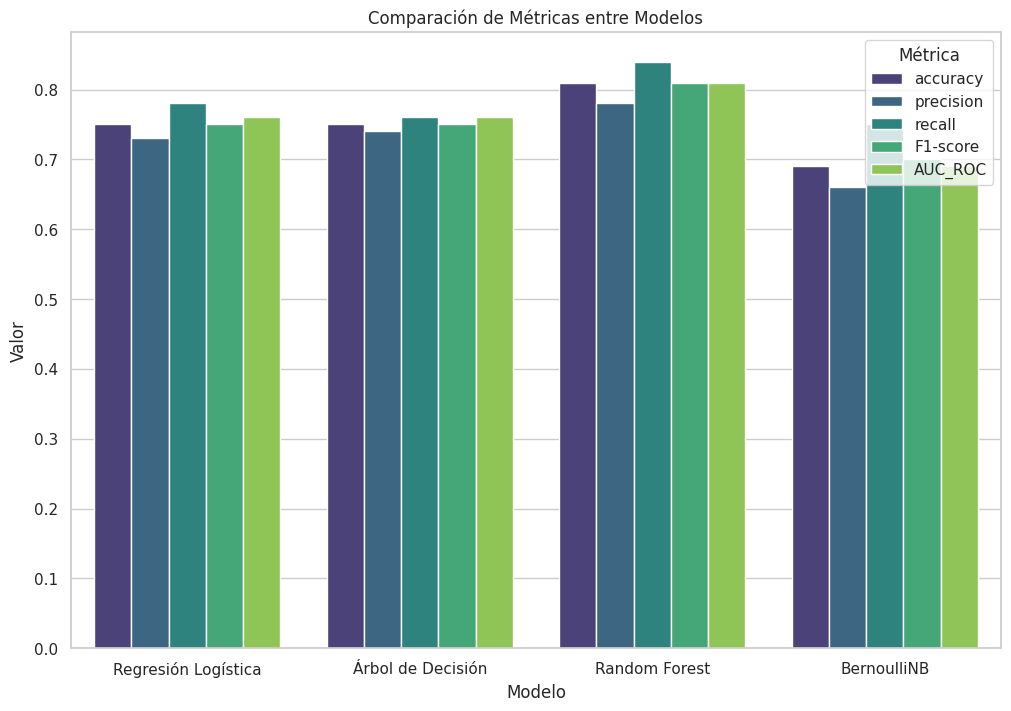

In [ ]:
# Crear un gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Modelo', y='Valor', hue='Métrica', data=df, palette='viridis')
plt.title('Comparación de Métricas entre Modelos')
plt.show()

In [ ]:
best_rf_model = rf_classifier.fit(X_train, y_train)

In [ ]:
importances = best_rf_model.feature_importances_

In [ ]:
indices_ordenados = np.argsort(importances)[::-1]


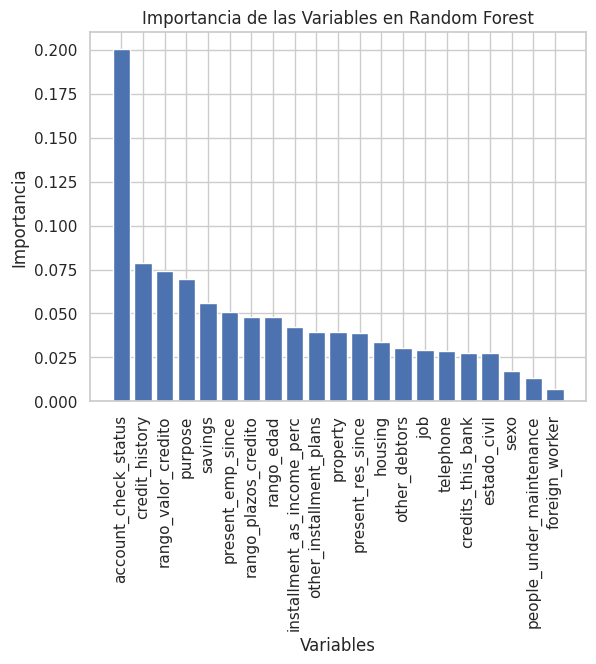

In [ ]:
import matplotlib.pyplot as plt

# Nombres de las variables
nombres_variables = X_train.columns

# Gráfico de barras de importancias
plt.bar(range(len(importances)), importances[indices_ordenados], align="center")
plt.xticks(range(len(importances)), nombres_variables[indices_ordenados], rotation=90)
plt.xlabel("Variables")
plt.ylabel("Importancia")
plt.title("Importancia de las Variables en Random Forest")
plt.show()


In [ ]:
df_banco = df_banco.drop(['foreign_worker','people_under_maintenance','sexo'], axis = 1)


In [ ]:
df_banco.head(3)

,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,telephone,rango_plazos_credito,rango_valor_credito,estado_civil,rango_edad,default
0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,2,1,5,0
1,2,3,5,5,3,2,1,2,1,3,2,1,3,0,4,6,0,1,1
2,4,5,8,5,2,2,1,3,1,3,2,1,2,0,1,3,1,3,0


In [ ]:
df_banco.shape

(1400, 19)

In [ ]:
rf_classifier = RandomForestClassifier

In [ ]:
# Ahora si creamos el modelo con los hiperparámetros ajustados
rf_classifier = RandomForestClassifier(random_state=42, max_depth = 10, n_estimators = 100)

In [ ]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# Probamos el modelo
prediccion_rf_classifier = rf_classifier.predict(X_test)
prediccion_rf_classifier

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,

In [ ]:
# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, prediccion_rf_classifier)
precision = precision_score(y_test, prediccion_rf_classifier)
recall = recall_score(y_test, prediccion_rf_classifier)
f1 = f1_score(y_test, prediccion_rf_classifier)


# Imprimir métricas
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8071428571428572
Precision: 0.776255707762557
Recall: 0.8415841584158416
F1 Score: 0.8076009501187648


In [ ]:
# Convertir las etiquetas y las predicciones a un formato binario
y_test_bin = label_binarize(y_test, classes=[0, 1])
prediccion_rf_classifier_bin = label_binarize(prediccion_rf_classifier, classes=[0, 1])

In [ ]:
auc_roc = roc_auc_score(y_test_bin, prediccion_rf_classifier_bin)
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.8084067581070034


### CREAMOS UN DICCIONARIO DE MAPEO CON LAS ETIQUETAS PREDICHAS Y LAS CATEGORÍAS ORIGINALES

In [ ]:
# Creamos un diccionario de mapeo. Es un diccionario que mapea las etiquetas predichas (0 y 1) a las categorías originales ('Good Customer' y 'Bad Customer').
mapeo_categorias = {0: 'Good Customer', 1: 'Bad Customer'}

In [ ]:
# Obtenemos las predicciones en el conjunto de prueba. Contiene las etiquetas predichas por el modelo para el conjunto de prueba.
predicciones = rf_classifier.predict(X_test)

In [ ]:
# Mapeamos las predicciones a las categorías originales. Es una lista que contiene las categorías originales correspondientes a las predicciones.
predicciones_categorias = [mapeo_categorias[prediccion] for prediccion in predicciones]

### CREAMOS UN DICCIONARIO CON LA FRECUENCIA DE LAS PREDICCIONES

In [ ]:
# Creamos un diccionario con la frecuencia de las predicciones. Se utiliza para contar las frecuencias de cada categoría.
frecuencia_predicciones = dict(zip(*np.unique(predicciones_categorias, return_counts=True))) # dict(zip(...)) se utiliza para crear un diccionario con las frecuencias
                                                                                             # de las categorías.

### Al mostrar frecuencia_predicciones, obtenemos un diccionario que indica la frecuencia de 'Good Customer' y 'Bad Customer' según las predicciones del modelo en el conjunto de prueba. Esto puede ser útil para entender cómo se distribuyen las predicciones en cada categoría.

In [ ]:
# Mostrar el diccionario de frecuencias
print(frecuencia_predicciones)

{'Bad Customer': 219, 'Good Customer': 201}
